# Medical Insurance cost prediction

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Modelin Library
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
# reading the dataset
df = pd.read_csv('insurance.csv')

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## From the above we can say this dataset consists of the following rows - 
- age	
- sex	
- bmi	
- children	
- smoker	
- region	
- charges

In [3]:
# display the first 5 row
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# giving the row and coloumn
df.shape

(1338, 7)

In [5]:
# checking the datatype, null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# statistical summary
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


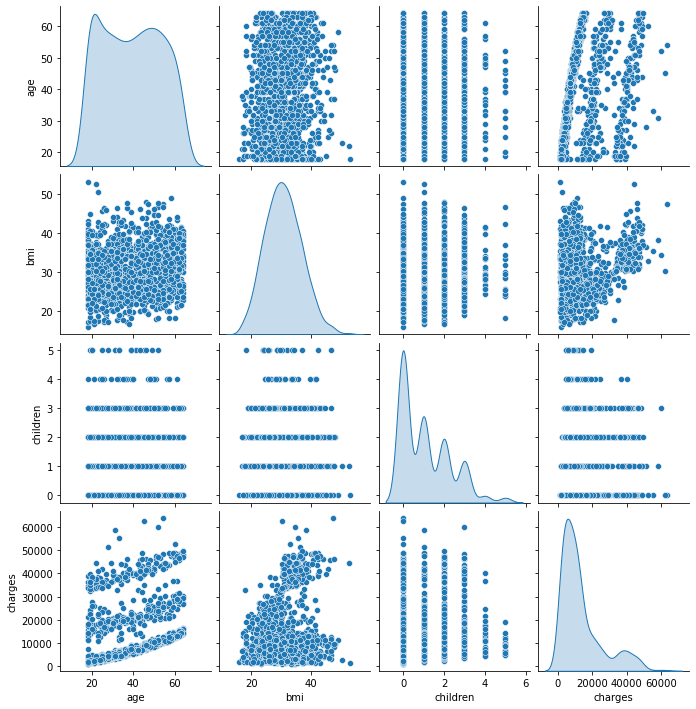

In [7]:
#Pairplot Visualization
sns.pairplot(df, diag_kind='kde')

<AxesSubplot:xlabel='age', ylabel='charges'>

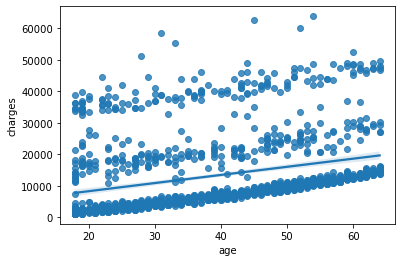

In [8]:
# visualize the data 
sns.regplot(x="age", y="charges", data=df)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

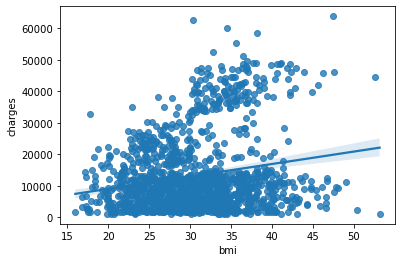

In [9]:
sns.regplot(x ="bmi", y="charges", data=df)

### Let's check in regionwise charges

In [10]:
#Charges per Region
region_charges = df.groupby(['region']).agg({'charges' : sum}).reset_index()
region_charges.sort_values(['charges'], ascending = False)

,region,charges
2,southeast,5.363690e+06
0,northeast,4.343669e+06
1,northwest,4.035712e+06
3,southwest,4.012755e+06


<AxesSubplot:xlabel='region', ylabel='charges'>

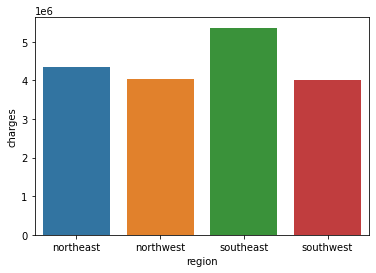

In [11]:
#Barplot Charges per Region
sns.barplot(x = 'region', y ='charges', data = region_charges)

<AxesSubplot:xlabel='region', ylabel='charges'>

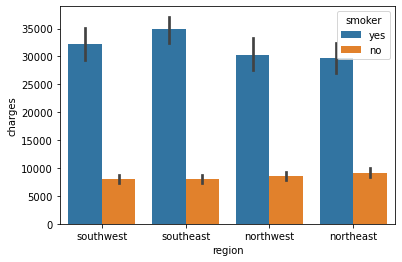

In [12]:
#Barplot with Hue Smoker
sns.barplot(x = df['region'], y = df['charges'], hue = df['smoker'], data = df)

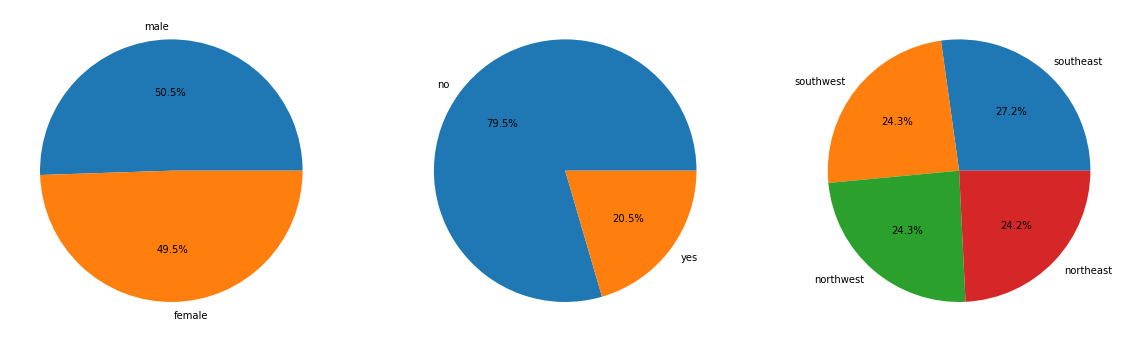

In [13]:
features = ['sex', 'smoker', 'region']
  
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
  
    x = df[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')
  
plt.show()

- above pie chart we can say that smoker are less, region are equally separated with 25% (approx)

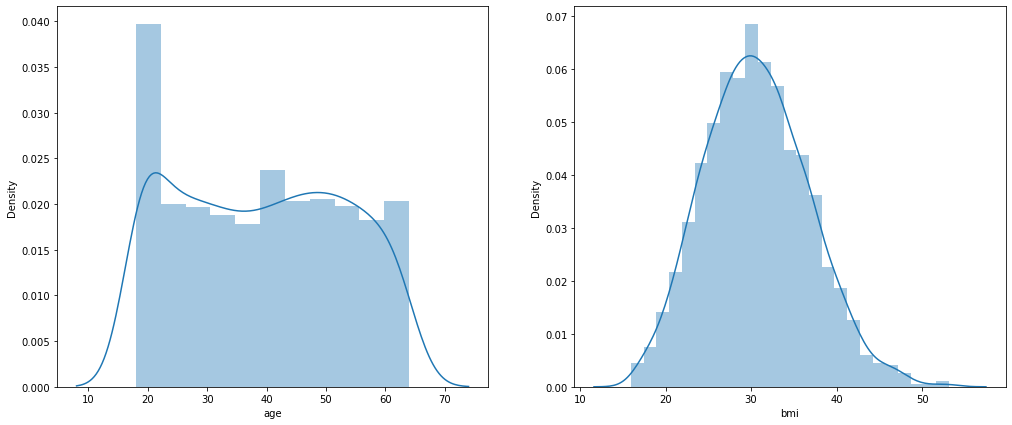

In [14]:
features = ['age', 'bmi']
  
plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.distplot(df[col])
plt.show()

- Data in both the age and BMI column approximately follow a Normal distribution which is a good point with respect to the model’s learning.

In [15]:
corr = df.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

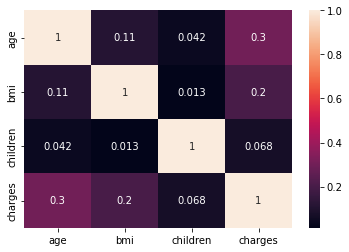

In [16]:
# finding the correlation
sns.heatmap(df.corr(), annot=True)

In [17]:
# cheacking null value
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [18]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [19]:
# drop the region coloumn as it is not important for now
df.drop('region', axis=1, inplace=True)

In [20]:
# check Duplicate Values
df.duplicated().sum()

1

In [21]:
# remove Duplicate Values
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [22]:
# Encode Categorical Data

for col in df.columns:
    if df[col].dtype == 'object':
        lbl=LabelEncoder()
        lbl.fit(list(df[col].values))
        df[col]=lbl.transform(df[col].values)

- actually , by doing this encode we can conclude that 'female' is replaced by '0' where 'male' with '1' . Also , 'yes' with '1' and 'no' with '0'

In [23]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


Data distribution analysys


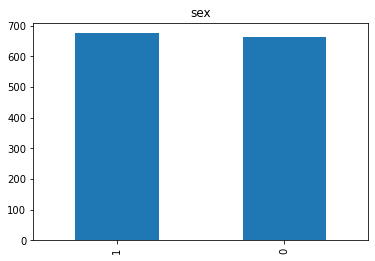

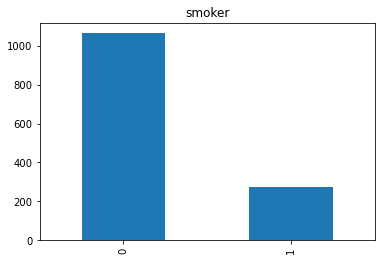

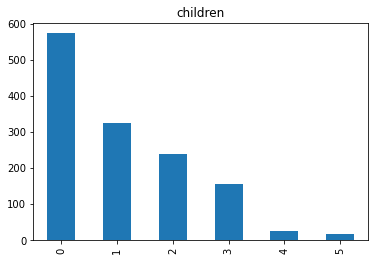

In [24]:
variables = ['sex','smoker','children']

# data distribution analysys
print('Data distribution analysys')
for v in variables:
    df = df.sort_values(by=[v])
    df[v].value_counts().plot(kind = 'bar')
    plt.title(v)
    plt.show()

- Above Smokers are aroud 250
- maximum have no children

In [41]:
# creating a new coloumn on the basis of bmi catagory
def bmi_category(bmi):
    if bmi < 18.5:
        return 'under-weight'
    elif bmi >= 18.5 and bmi <= 24.9:
        return 'normal-weight'
    elif bmi >= 24 and bmi <= 29.9:
        return 'over-weight'
    elif bmi > 30.0:
        return "obese"
    
def age_category(age):
    age_dict = {
        0: '0-9',
        1: '10-19',
        2: '20-29',
        3: '30-39',
        4: '40-49',
        5: '50-59',
        6: '60-69',
        7: '70-79',
        8: '80-89',
        9: '90-99',
        10: '100-200'
    }
    return age_dict[age//10]
    
df['cbmi'] = df['bmi'].apply(lambda x: "none")
df['cage'] = df['age'].apply(lambda x: "none")

for idx, row in df.iterrows():
    df.at[idx, 'cage'] = age_category(row['age'])
    df.at[idx, 'cbmi'] = bmi_category(row['bmi'])
    
by_age = df.groupby(by='cage').size()
print (by_age)
print ('-'*80)

by_sex = df.groupby(by='sex').size()
print (by_sex)
print ('-'*80)

by_smoker = df.groupby(by='smoker').size()
print (by_smoker)
print ('-'*80)


by_children = df.groupby(by='children').size()
print (by_children)
print ('-'*80)

by_bmi = df.groupby(by='cbmi').size()
print (by_bmi)
print ('-'*80)

cage
10-19    136
20-29    280
30-39    257
40-49    279
50-59    271
60-69    114
dtype: int64
--------------------------------------------------------------------------------
sex
0    662
1    675
dtype: int64
--------------------------------------------------------------------------------
smoker
0    1063
1     274
dtype: int64
--------------------------------------------------------------------------------
children
0    573
1    324
2    240
3    157
4     25
5     18
dtype: int64
--------------------------------------------------------------------------------
cbmi
normal-weight    222
obese            704
over-weight      380
under-weight      20
dtype: int64
--------------------------------------------------------------------------------


Mean cost analysys:


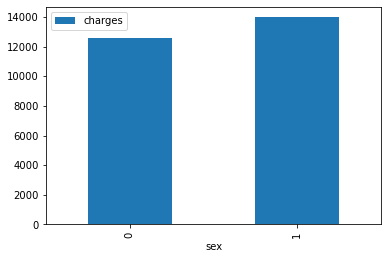

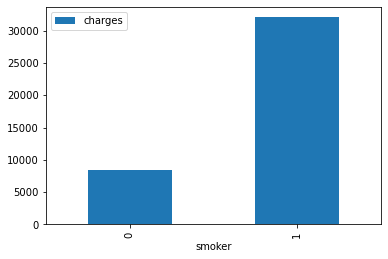

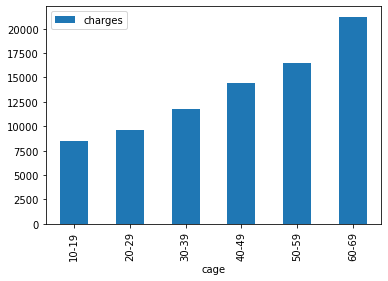

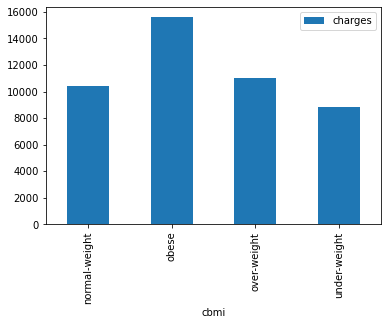

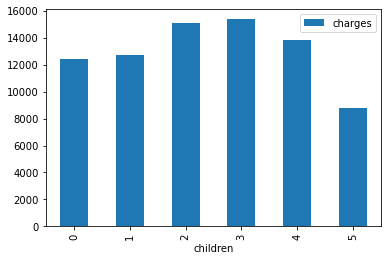

In [42]:
print('Mean cost analysys:')
var = ['sex','smoker','cage','cbmi','children']
for v in var:
    group_df = df.groupby(pd.Grouper(key=v)).mean()
    group_df = group_df.sort_index()
    group_df.plot(y = ['charges'],kind = 'bar')
    plt.show()

- male is charging more for insurance
- smoker is also charging high for insurance
- age between 60-69 are hight in charging insurance
- those have 2, 3 children are charging high

## When designing a machine learning model, we typically split our data into three separate sets:

* Training set: This is the portion of the data that we use to train our model. We use this data to fit the parameters of our model, and the model adjusts its internal parameters to minimize the difference between its predictions and the actual outcomes.

* Validation set: This is the portion of the data that we use to tune the hyperparameters of our model. Hyperparameters are the settings that we choose before training our model, such as the learning rate, number of hidden layers, and number of neurons in each layer. By evaluating the performance of our model on the validation set, we can adjust these hyperparameters to improve the model's performance.

* Test set: Once we have trained and tuned our model, we evaluate its performance on a separate, unseen test set. This gives us a measure of how well the model generalizes to new data, and allows us to estimate its performance on real-world data.

### By splitting our data into these separate sets, we can ensure that our model is not overfitting to the training data, and that it is able to generalize to new data. This is important because our ultimate goal is to use the model to make accurate predictions on new, unseen data.

In [25]:
# spliting data
X =df.drop('charges',axis=1)
y =df['charges']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.20, random_state=0)


## Scaling the data is an important step in building machine learning models because it can have a significant impact on the performance of the model.

- Scaling can speed up the training process: In some cases, scaling the data can speed up the training process of machine learning models. This is because scaling can make the optimization algorithms converge more quickly.

### There are several methods for scaling data, including standardization (subtracting the mean and dividing by the standard deviation), normalization (scaling the data to a range of values, such as [0,1]), and log transformation (applying a logarithmic function to the data). The choice of scaling method depends on the specific requirements of the model and the characteristics of the data.








In [26]:
# Scaling Data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


## The best model for prediction depends on various factors such as the nature of the problem, the type and size of the data, and the performance metrics of interest. Some popular machine learning models for prediction tasks include:

- Linear Regression: Linear regression is a simple and commonly used model for prediction tasks where the relationship between the independent variables and the dependent variable is linear. It can work well for problems with a large number of features and provides easily interpretable coefficients.

- Random Forest: Random forest is an ensemble learning algorithm that creates multiple decision trees and combines their predictions to make a more accurate prediction. It can handle a large number of features and is less prone to overfitting than other decision tree algorithms.

- DecisionTree: The decision tree algorithm builds a tree-like model of decisions and their possible consequences. It starts with a single node, known as the root node, and then branches out to additional nodes based on certain criteria, such as the most significant features or variables in the data.

- Ridge: Ridge regression is a regularization technique used in linear regression to prevent overfitting. It adds a penalty term to the cost function that includes the sum of squares of the magnitude of the regression coefficients. This penalty term, also known as the L2 regularization term, shrinks the magnitude of the coefficients towards zero without eliminating them completely, thus reducing the complexity of the model and preventing overfitting. Ridge regression is often used in situations where there are more predictors than observations, or when the predictors are highly correlated with each other, which can cause the coefficients to become unstable and lead to overfitting.
- Lasso: Lasso (Least Absolute Shrinkage and Selection Operator) is a linear regression method that uses L1 regularization to reduce the complexity of the model and prevent overfitting. It adds a penalty term to the least squares objective function of linear regression, which encourages the model to reduce the magnitude of the coefficients of the features, effectively setting some coefficients to zero. This results in a simpler and more interpretable model, and can help with feature selection by identifying and eliminating less relevant features. Lasso can be particularly useful when dealing with high-dimensional data, where the number of features is much larger than the number of samples, as it can effectively identify and eliminate irrelevant features, reducing the risk of overfitting.



In [27]:
def evaluation(model, prediction, xtrain, ytrain, xtest, ytest):
    print('MAE : %.2f' % mean_absolute_error(ytest, prediction)) # MAE
    print('RMSE : %.2f' % mean_squared_error(ytest, prediction, squared=False)) # RMSE
    print('R2 score : %.2f' % r2_score(ytest, prediction)) # R2 score
    print('Train Accuracy :', model.score(xtrain, ytrain)) # Train Accuracy
    print('Test Accuracy :', model.score(xtest, ytest)) # Test Accuracy

In [28]:
#Modeling
models = {
    'LinearRegression' : LinearRegression(),
    'DecisionTree'     : DecisionTreeRegressor(),
    'RandomForest'     : RandomForestRegressor(),
    'Ridge'            : Ridge(),
    'Lasso'            : Lasso()
}

for model_name, model in models.items():
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    print('Model: {}'.format(model_name))
    print(evaluation(model, prediction, x_train, y_train, x_test, y_test), '\n')

Model: LinearRegression
MAE : 4350.24
RMSE : 6251.33
R2 score : 0.75
Train Accuracy : 0.7494094581087444
Test Accuracy : 0.7495503994584085
None 

Model: DecisionTree
MAE : 3275.51
RMSE : 6734.52
R2 score : 0.71
Train Accuracy : 0.9988109566017487
Test Accuracy : 0.7093380698139051
None 

Model: RandomForest
MAE : 2890.66
RMSE : 5086.05
R2 score : 0.83
Train Accuracy : 0.9742861674925258
Test Accuracy : 0.8342186532488303
None 

Model: Ridge
MAE : 4351.80
RMSE : 6251.71
R2 score : 0.75
Train Accuracy : 0.7494088053013646
Test Accuracy : 0.7495205932841177
None 

Model: Lasso
MAE : 4350.25
RMSE : 6251.40
R2 score : 0.75
Train Accuracy : 0.7494094235254058
Test Accuracy : 0.749545024627323
None 



* from the above outcome we can conclude RandomForest algorithm is best suitable

In [35]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

# make predictions on the testing set
y_pred = model.predict(x_test)
y_pred

array([14008.1650291 , 14592.2716727 ,  3485.7477362 ,  4039.2716027 ,
        6374.9634605 , 14201.0555115 , 13039.8473455 , 15827.8184682 ,
       16750.4008597 , 39805.5825885 ,  5553.5220135 ,  6861.6960363 ,
        5497.8123975 ,  6566.1009015 ,  9340.4223277 ,  8664.137993  ,
       18722.8014606 ,  2354.27477069,  9994.7099303 , 40057.842597  ,
        1860.8658725 ,  5693.7882794 ,  2645.1022005 ,  3303.1821294 ,
        8193.5745252 , 20822.0882586 , 13812.3538214 , 12017.8170251 ,
       10844.8382135 ,  8090.9593845 , 11169.4366474 , 23738.978414  ,
        7327.8125195 ,  1619.19641959, 10999.1256005 , 12900.1073557 ,
       10336.8818581 ,  2377.6710331 ,  9519.4352564 , 50394.1404607 ,
       15304.3256749 , 12844.2986148 ,  8801.4346142 ,  2578.940767  ,
        5143.55027609, 18198.0829255 ,  7749.6680563 ,  2596.497654  ,
       17999.4806577 ,  6601.8239628 ,  6210.7361995 ,  6750.514123  ,
       16408.3541048 , 20056.395805  , 16669.3145715 , 40109.2651663 ,
      

# Conclusion

### Comparing these performance metrics for the models you have provided, some observations can be made:

- The Linear Regression, Ridge and Lasso models have similar performance metrics, with the Random Forest model being the best-performing model in terms of MAE, RMSE and R2 score, and the Decision Tree model being the worst-performing model in terms of MAE and RMSE.
- The Random Forest model has the highest R2 score of 0.83, indicating that it is able to explain a higher percentage of variance in the target variable compared to the other models.
* The training accuracies for all models are relatively high, but the test accuracies vary. The Random Forest model has the highest test accuracy of 0.83, followed by the Linear Regression, Ridge and Lasso models with test accuracies around 0.75-0.76, and the Decision Tree model having the lowest test accuracy of 0.75.
* The Random Forest model has the lowest MAE and RMSE values, which suggests that it is making the smallest errors in its predictions.
### Overall, based on these performance metrics, the Random Forest model seems to be the best-performing model for this problem, as it has the highest R2 score and the lowest MAE and RMSE values, indicating that it is able to explain the variance in the target variable well and make accurate predictions.